# 파이토치(PyTorch)

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공


## 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용


## 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능


In [139]:
import torch

In [140]:
# 무작위 초기화된 텐서
x = torch.rand(4,2)
x

tensor([[0.6157, 0.6748],
        [0.8489, 0.5802],
        [0.0121, 0.4320],
        [0.5125, 0.5753]])

In [141]:
# 데이터 타입 long이고 0으로 채워진 텐서
x = torch.zeros(4,2,dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

In [142]:
# 사용자가 입력한 값으로 텐서 초기화
x = torch.tensor([3,2,3])
x

tensor([3, 2, 3])

In [143]:
# 2x4 크기, double, 1로 채워진 텐서
x = x.new_ones(2,4,dtype=torch.double)
print(x)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)


In [144]:
x = torch.randn_like(x,dtype=torch.float)
print(x)

tensor([[ 1.1751,  0.2507, -1.6391, -0.2561],
        [ 0.4780, -1.1827,  0.8203,  0.6953]])


In [145]:
x.size()

torch.Size([2, 4])

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |


In [146]:
ft = torch.FloatTensor([1,2,3])
ft

tensor([1., 2., 3.])

In [147]:
bt = torch.ByteTensor([0,1,-1])
bt

tensor([  0,   1, 255], dtype=torch.uint8)

In [148]:
# CUDA Tensors : .to 메소드를 사용하여 텐서를 특정 장치(cpu,gpu)로 옮길 수 있음.
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)


tensor([1.0473])
1.0473171472549438
torch.float32


In [149]:
device = torch.device('cuda' if torch.cuda. is_available() else 'cpu')
print(device)

cuda


In [150]:
y = torch.ones_like(x,device = device)
print(y)
x = x.to(device)
print(x)
z = x + y
print(z)
print(z.to('cpu',torch.double))

tensor([1.], device='cuda:0')
tensor([1.0473], device='cuda:0')
tensor([2.0473], device='cuda:0')
tensor([2.0473], dtype=torch.float64)


In [151]:
# 다차원 tensor
# 0D tensor scalor
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


In [152]:
# 2D tensor scalor
t2 = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [153]:
# 과제 : 3,4,5차원 텐서 생성
t3 = torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]],[[9,8],[7,6]]])
t3

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]],

        [[9, 8],
         [7, 6]]])

In [154]:
# 텐서 연산
import math

a = torch.randn(1,2) * 2 -1
print(a)
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))
print(torch.clamp(a,-0.5,0.5))

tensor([[0.8825, 0.2194]])
tensor([[0.8825, 0.2194]])
tensor([[1., 1.]])
tensor([[0., 0.]])
tensor([[0.5000, 0.2194]])


In [155]:
print(a)
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,1])))

tensor([[0.8825, 0.2194]])
tensor(0.2194)
tensor(0.8825)
tensor(0.5509)
tensor(0.4689)
tensor(0.1936)
tensor([1, 2, 3])


In [156]:
# torch로 사칙연산(add, sub, mul, div), 내적 연산(matmul,mm) 수행(1번 이상)

In [157]:
a  = torch.tensor([[1,2],[3,4]])
b  = torch.tensor([[5,6],[7,8]])

print(torch.add(a,b))
print(torch.sub(a,b))
print(torch.mul(a,b))
print(torch.div(a,b))
print(torch.mm(a,b))

tensor([[ 6,  8],
        [10, 12]])
tensor([[-4, -4],
        [-4, -4]])
tensor([[ 5, 12],
        [21, 32]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19, 22],
        [43, 50]])


In [158]:
#manipulations
# 인덱싱 : numpy처럼 ㅁ인덱힝 형태로 사용 가능

import torch
x = torch.tensor([[1,2],[3,4]])
print(x)

print(x[0,0])

tensor([[1, 2],
        [3, 4]])
tensor(1)


In [159]:
print(x[:,0])

tensor([1, 3])


In [160]:
print(x[0,:])

tensor([1, 2])


In [161]:
# view : 텐서의 크기(size)나 모양(shape)을 변경

x = torch.randn(4,5)
print(x.shape)
print(x.size())

torch.Size([4, 5])
torch.Size([4, 5])


In [162]:
print(x,'\n')

y = x.view(20)
print(y)

tensor([[ 1.3175,  0.7210, -0.1557,  0.6067,  0.4676],
        [ 1.3974,  1.2897,  1.3179,  0.2720, -1.2245],
        [-1.7062, -0.8534,  1.1308,  0.2766, -0.5935],
        [ 0.2477, -0.4513,  1.0337,  0.1443, -2.3234]]) 

tensor([ 1.3175,  0.7210, -0.1557,  0.6067,  0.4676,  1.3974,  1.2897,  1.3179,
         0.2720, -1.2245, -1.7062, -0.8534,  1.1308,  0.2766, -0.5935,  0.2477,
        -0.4513,  1.0337,  0.1443, -2.3234])


In [163]:
z = x.view(5,-1)
z

tensor([[ 1.3175,  0.7210, -0.1557,  0.6067],
        [ 0.4676,  1.3974,  1.2897,  1.3179],
        [ 0.2720, -1.2245, -1.7062, -0.8534],
        [ 1.1308,  0.2766, -0.5935,  0.2477],
        [-0.4513,  1.0337,  0.1443, -2.3234]])

In [164]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([-0.0491])
-0.04911455512046814
torch.float32


In [165]:
x = torch.randn(2)
print(x)
print(x.dtype)

# item은 스칼라값 하나만 사용 가능

tensor([ 2.1783, -0.4246])
torch.float32


In [166]:
# squeze 차원 축소
tensor1 = torch.rand(1,3,3)
print(tensor1)
print(tensor1.shape)

tensor([[[0.5465, 0.3035, 0.7295],
         [0.2290, 0.8302, 0.7123],
         [0.4637, 0.6241, 0.2776]]])
torch.Size([1, 3, 3])


In [167]:
t = tensor1.squeeze()
print(t)

tensor([[0.5465, 0.3035, 0.7295],
        [0.2290, 0.8302, 0.7123],
        [0.4637, 0.6241, 0.2776]])


In [168]:
x = torch.FloatTensor([[1,2],
                       [3,4],
                       [5,6],
                       [7,8]])
print(x)

#size 를 활용한 텐서 사이즈 보기
print(x.size())
#  shape 를 활용한 텐서 사이즈 보기
print(x.shape)
# dim을 활용한 텐서 차원확인
print(x.dim())
#0차원 사이즈 확인
print(x.size(0))
#1차원 사이즈 확인
print(x.shape[1])


tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])
torch.Size([4, 2])
torch.Size([4, 2])
2
4
2


In [169]:
# stack : 텐서 간 결합
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])

print(torch.stack([x,y,z]))

tensor([1., 4.])
tensor([2., 5.])
tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


cat = 텐서를 결합하는 메소드 (concatnate)
- stack과 유사하지만 쌓을 dim이 존재해야 함
- 해당 차원을 늘려준 후 결

In [170]:
a = torch.randn(1,3,3)
print(a)
b = torch.randn(1,3,3)
print(b)
c = torch.cat((a,b),dim = 1)
print(c)
print(c.size())

tensor([[[-0.1492, -0.0620,  0.9778],
         [-0.6168, -0.2081,  0.7478],
         [ 0.4450,  0.5209,  0.1127]]])
tensor([[[ 1.0293, -0.5415,  0.9394],
         [ 0.6184, -2.3810, -0.9946],
         [ 0.4845,  0.5364,  1.2467]]])
tensor([[[-0.1492, -0.0620,  0.9778],
         [-0.6168, -0.2081,  0.7478],
         [ 0.4450,  0.5209,  0.1127],
         [ 1.0293, -0.5415,  0.9394],
         [ 0.6184, -2.3810, -0.9946],
         [ 0.4845,  0.5364,  1.2467]]])
torch.Size([1, 6, 3])


In [171]:
# chunk : 텐서를 여러 개로 나눌 때 사용(나눌 갯수를 정함)
tensor = torch.rand(3,6)
t1,t2,t3 = torch.chunk(tensor,3,dim=1)
print(t1,'\n',t2,'\n',t3)

tensor([[0.6148, 0.2730],
        [0.0979, 0.5427],
        [0.8528, 0.0949]]) 
 tensor([[0.0216, 0.0603],
        [0.1270, 0.0766],
        [0.0170, 0.7879]]) 
 tensor([[0.3870, 0.4308],
        [0.3990, 0.6436],
        [0.6956, 0.0121]])


In [172]:
# split : 나눠진 텐서의 크기를 정하고 split
tensor = torch.rand(3,6)
t1,t2,t3 = torch.split(tensor,2,dim=1)
print(t1,'\n',t2,'\n',t3)

tensor([[0.3184, 0.9768],
        [0.8132, 0.7844],
        [0.3142, 0.7108]]) 
 tensor([[0.1482, 0.7735],
        [0.3258, 0.7900],
        [0.7581, 0.5855]]) 
 tensor([[0.5764, 0.4987],
        [0.0790, 0.7301],
        [0.8175, 0.8752]])


torch ↔️ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [173]:
from torch.cuda import is_available
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

print(device)

cuda


In [174]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [175]:
print(a.to('cpu', torch.double))
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1., 1., 1.])


In [176]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [177]:
a.add_(1)
print(a)

tensor([2., 2., 2., 2., 2., 2., 2.])


In [178]:
print(b)

[2. 2. 2. 2. 2. 2. 2.]


In [179]:
import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b)

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html

- `requires_grad` 속성을 True로 설정하면 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작. 
- 기록을 추적하는 것을 중단하게 하려면 `.detach()`를 호출하여 연산 기록으로부터 분리
- grad_fn : 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해서 backprop 했는지)

In [180]:
a = torch.randn(3,3)
a = a * 3
print(a)
print(a.requires_grad)

tensor([[ 4.1769, -0.0210, -1.4247],
        [-0.7565,  0.9200, -3.8991],
        [ 0.5065, -2.3470,  1.5259]])
False


In [181]:
a.requires_grad_(True)
print(a.requires_grad)

True


In [182]:
b = (a*a).sum()
print(b)
print(b.grad_fn)

tensor(44.1912, grad_fn=<SumBackward0>)


In [183]:
# 기울기(gradient)
x = torch.ones(3,3,requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [184]:
 xx = torch.rand(2,2)
 yy = torch.rand(2,2)
 print(xx,'\n',yy)

tensor([[0.2241, 0.0897],
        [0.4739, 0.9762]]) 
 tensor([[0.0429, 0.5548],
        [0.9623, 0.5791]])


In [185]:
# in-place 방식으로 텐서의 값을 변경하는 연산 뒤에는 _가 붙음

In [186]:
y = x+5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [187]:
z = y*y
out = z.mean()
print(z,out)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [188]:
print(out)
out.backward() # backward를 통해서 역전파 계산이 가능

tensor(36., grad_fn=<MeanBackward0>)


In [189]:
# grad : data가 거쳐온 layer에 대한 미분값 저장

In [190]:
print(x.grad)

tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [191]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


In [192]:
# detach() : 내용물은 같지만 
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

True
False


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐

In [193]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [194]:
a = torch.ones(3,3,requires_grad = True)
print(a)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [195]:
print(a.data)
print(a.grad)
print(a.grad_fn)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
None
None


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행

In [196]:
from torch.utils.data import Dataset, DataLoader

In [197]:
import torchvision.transforms as transforms
from torchvision import datasets

In [198]:
mnist_transforms = transforms.Compose([transforms.ToTensor(),
                                                           transforms.Normalize(mean=(0.5,), std=(1.0,))])

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [199]:
trainset = datasets.MNIST(root = '/content',
                          train=True, download=True,
                          transform = mnist_transforms)
testset = datasets.MNIST(root = '/content',
                          train=False, download=True,
                          transform = mnist_transforms)

In [200]:
!ls ./MNIST/raw

t10k-images-idx3-ubyte	   train-images-idx3-ubyte
t10k-images-idx3-ubyte.gz  train-images-idx3-ubyte.gz
t10k-labels-idx1-ubyte	   train-labels-idx1-ubyte
t10k-labels-idx1-ubyte.gz  train-labels-idx1-ubyte.gz


In [201]:
# DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기 만큼 데이터를 가져옴
train_loader = DataLoader(trainset, batch_size = 8, shuffle = True, num_workers=2)
test_loader = DataLoader(testset, batch_size = 8, shuffle = True, num_workers=2)

In [202]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [203]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

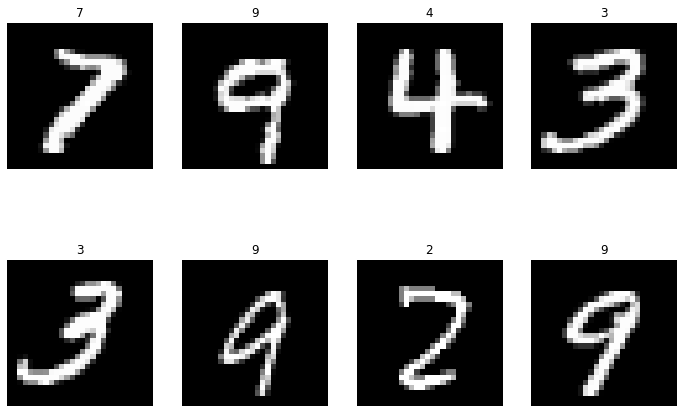

In [204]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (12,8))

cols,rows = 4,2
for i in range(1,cols*rows +1):
  sample_idx = torch.randint(len(trainset),size = (1,)).item()
  img,label = trainset[sample_idx]
  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(),cmap='gray')
plt.show()

## 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성

### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html

In [205]:
import torch
import torch.nn as nn

In [206]:
input = torch.randn(128,20)
print(input)

m = nn.Linear(20,30)
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[ 0.8035,  0.5906, -0.8996,  ..., -0.5623,  1.2144, -0.4733],
        [ 1.1731, -0.1412,  0.1155,  ...,  2.2409, -0.1534, -0.1767],
        [ 0.4435,  0.7433, -0.3646,  ..., -0.5767,  0.4788, -0.7676],
        ...,
        [ 1.3094, -1.9313, -0.2135,  ...,  1.2154, -0.2161, -0.0826],
        [ 0.2206, -0.2428,  0.7865,  ..., -1.5109, -0.1633, -1.6317],
        [ 0.5665, -1.4325, -0.1320,  ..., -1.6403,  1.7560,  0.8025]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.0341,  1.0324,  0.2311,  ..., -0.3623, -0.7027, -1.3552],
        [ 0.1477, -0.5887,  0.7664,  ...,  0.0979, -1.2341, -0.3500],
        [ 0.0423, -0.3325, -0.1677,  ..., -0.3822,  0.5770, -0.2737],
        ...,
        [ 0.0078,  0.2832,  0.2031,  ...,  0.2564,  0.2708,  0.0035],
        [-0.0134,  0.4995, -0.9212,  ..., -0.3255,  0.9946,  0.1434],
        [ 0.3733,  0.5118, -0.5017,  ..., -0.5550,  0.7958, -0.2149]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


In [207]:
input = torch.randn(20,16,50,100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [208]:
# dilation : 한 픽셀에서 다른 픽셀까지의 거리
m = nn.Conv2d(16,33,kernel_size = 3,stride = 2)
m = nn.Conv2d(16,33,kernel_size = (3,5), stride = (2,1),padding = (4,2))
m = nn.Conv2d(16,33,kernel_size = (3,5), stride = (2,1),padding = (4,2),dilation = (3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


https://gaussian37.github.io/dl-concept-covolution_operation/#dilation-%EC%9D%B4%EB%9E%80-1

In [209]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [210]:
nn.Conv2d(in_channels=1, out_channels=20,kernel_size = 5, stride = 1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [211]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [212]:
weight = layer.weight
weight.shape

torch.Size([20, 1, 5, 5])

In [213]:
weight = weight.detach()
weight = weight.numpy()
weight.shape

(20, 1, 5, 5)

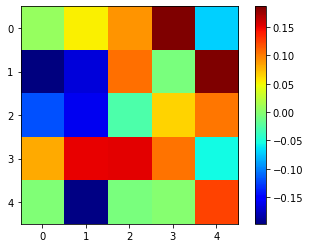

In [214]:
import matplotlib.pyplot as plt

plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show()

In [215]:
# mnist image
print(images.shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [216]:
input_data = torch.unsqueeze(images[0],dim = 0)
print(input_data.size())

torch.Size([1, 1, 28, 28])


In [217]:
output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

(1, 20, 24, 24)

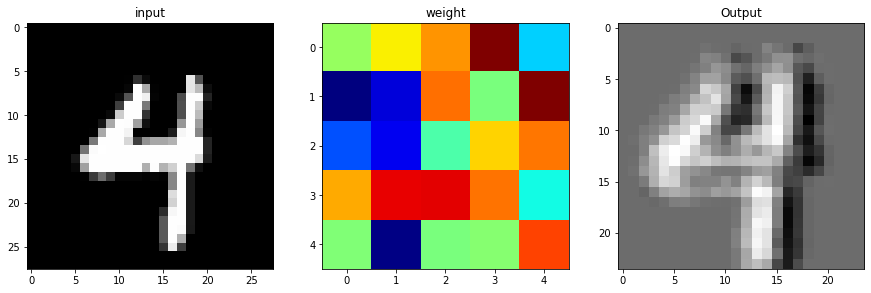

In [218]:
plt.figure(figsize=(15,30))
plt.subplot(131)
plt.title('input')
plt.imshow(input_image,'gray')

plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0,0,:,:],'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:],'gray')

plt.show()

### 풀링 레이어(Pooling layers)

- `F.max_pool2d` 
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [219]:
import torch.nn.functional as F
pool = F.max_pool2d(output,2,2)
pool.shape

torch.Size([1, 20, 12, 12])

In [220]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

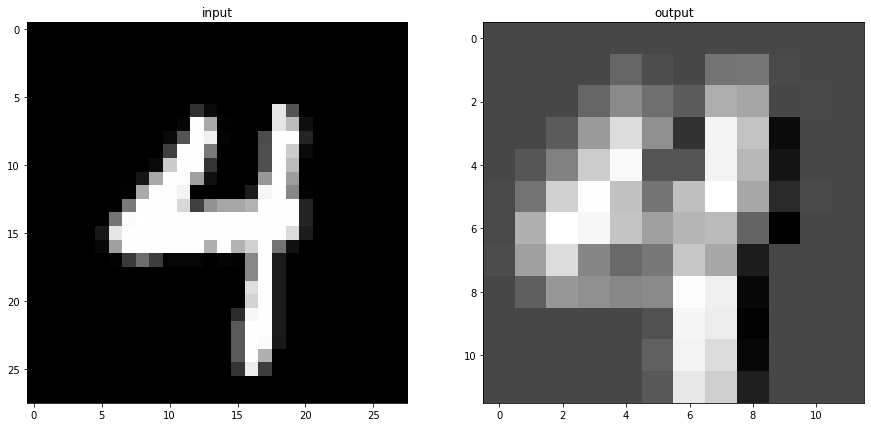

In [221]:
plt.figure(figsize=(15,30))
plt.subplot(121)
plt.title('input')
plt.imshow(input_image,'gray')

plt.subplot(122)
plt.title('output')
plt.imshow(pool_arr[0,0,:,:],'gray')

In [222]:
# linear layer : 1d만 가능 .view()를 통해 1d로 펼쳐주어야 함
flatten = input_image.view(1,28 * 28)
flatten.shape

torch.Size([1, 784])

In [223]:
lin = nn.Linear(784,10)(flatten)
lin.shape

torch.Size([1, 10])

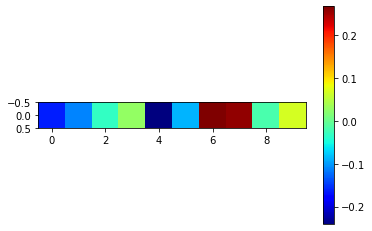

In [224]:
plt.imshow(lin.detach().numpy(),'jet')
plt.colorbar()
plt.show()

In [225]:
# 비선형 활성화 함수

with torch.no_grad():
  flatten = input_image.view(1,28*28)
  lin = nn.Linear(784,10)(flatten)
  softmax = F.softmax(lin,dim=1)

softmax

tensor([[0.0848, 0.0998, 0.1189, 0.1032, 0.0974, 0.0783, 0.1335, 0.0454, 0.1093,
         0.1293]])

선형 회귀 모델

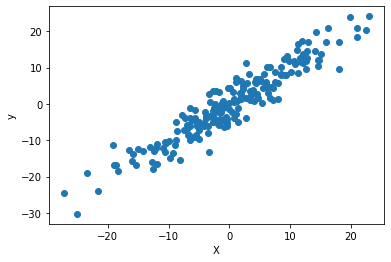

In [226]:
X = torch.randn(200,1)*10
y = X + 3 * torch.randn(200,1)

plt.scatter(X.numpy(),y.numpy())
plt.ylabel('y')
plt.xlabel('X')

plt.show()

In [227]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super(LinearRegressionModel,self).__init__()
    self.linear = nn.Linear(1,1)

  def forward(self,x):
    pred = self.linear(x)
    return pred

In [228]:
model = LinearRegressionModel()
print(model)
print(list(model.parameters()))

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[-0.2737]], requires_grad=True), Parameter containing:
tensor([-0.1166], requires_grad=True)]


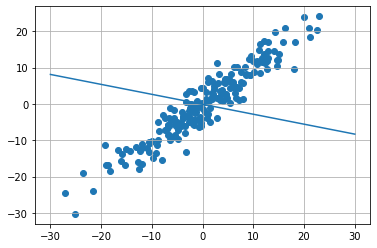

In [229]:
import numpy as np
w,b = model.parameters()
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30])
y1 = w1*x1 + b1

plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y1)
plt.grid()
plt.show()

In [230]:
import torch.optim as optim
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(),lr=0.001)

In [231]:
epochs = 100
losses = []

for epoch in range(epochs):
  optimizer.zero_grad()

  y_pred = model(X)
  loss = criterion(y_pred,y)
  losses.append(loss.item())
  loss.backward() # 역전파 수행, 자동 미분 결과 업데이트

  optimizer.step() # 옵티마이저 스텝을 다음으로 진행

  

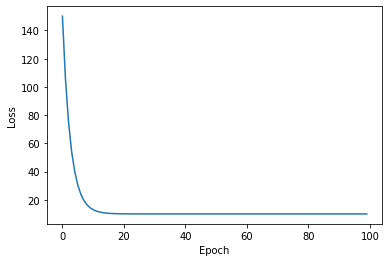

In [232]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

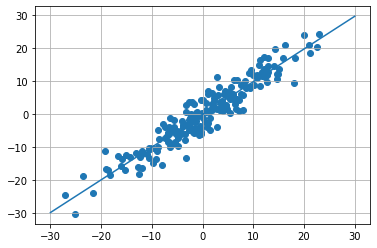

In [233]:
w1, b1 = w[0][0].item(), b[0].item()
x1 = np.array([-30,30])
y1 = w1*x1 + b1

plt.scatter(X.numpy(),y.numpy())
plt.plot(x1,y1)
plt.grid()
plt.show()

FashionMNIST 분류 모델

In [234]:
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

In [235]:
trainset = datasets.FashionMNIST(root = '/content/',
                                 train = True,
                                 download = True,
                                 transform = transform)

testset = datasets.FashionMNIST(root = '/content/',
                                 train = False,
                                 download = True,
                                 transform = transform)

In [236]:
train_loader = DataLoader(trainset,batch_size = 128, num_workers=2)
test_loader = DataLoader(testset,batch_size = 128, num_workers=2)

In [237]:
images, labels = next(iter(train_loader))
images.shape, labels.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [238]:
labels_map = {
    0:'T-Shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle Boot'
}

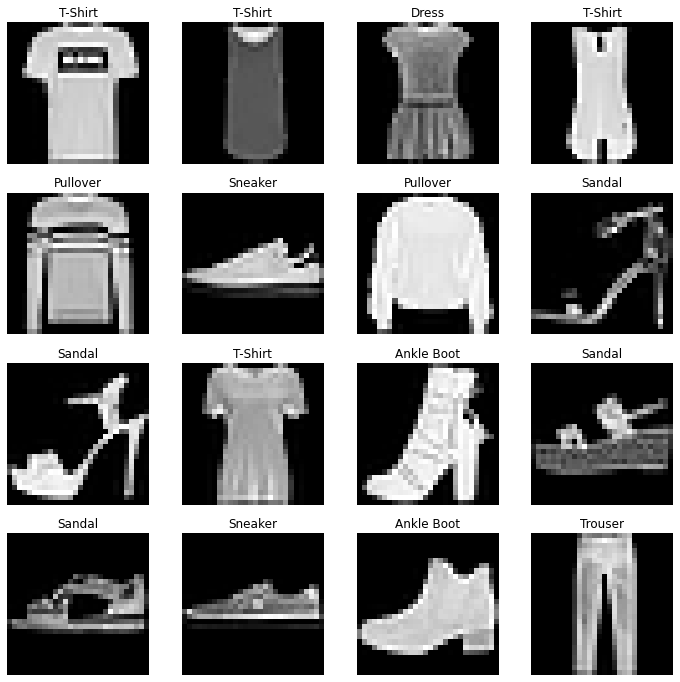

In [239]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize = (12,12))
cols,rows = 4,4
for i in range(1,cols*rows + 1):
  image = images[i].squeeze()
  label_idx = labels[i].item()
  label = labels_map[label_idx]

  figure.add_subplot(rows,cols,i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(image,cmap='gray')

plt.show()

In [240]:
from re import S
# 모델 정의 및 파라미터
import torch.nn.functional as F

class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet, self).__init__()

    self.conv1 = nn.Conv2d(1,6,3)
    self.conv2 = nn.Conv2d(6,16,3)
    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,x):
    x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = x.view(-1,self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

  def num_flat_features(self,x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s 

    return num_features
net = NeuralNet()
print(net)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [241]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 3, 3])


In [242]:
input = torch.randn(1,1,28,28)
out = net(input)
print(out)

tensor([[ 0.0534, -0.1077,  0.1011, -0.0642, -0.0791, -0.0621, -0.0113,  0.0510,
         -0.0050, -0.0092]], grad_fn=<AddmmBackward0>)


In [243]:
# 손실 함수와 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [244]:
# 모델 학습
total_batch = len(train_loader)
print(total_batch)

469


zero_grad()

보통 딥러닝에서는 미니배치+루프 조합을 사용해서 parameter들을 업데이트하는데,
한 루프에서 업데이트를 위해 loss.backward()를 호출하면 각 파라미터들의 .grad 값에 변화도가 저장이 된다.

이후 다음 루프에서 zero_grad()를 하지않고 역전파를 시키면 이전 루프에서 .grad에 저장된 값이 다음 루프의 업데이트에도 간섭을 해서 원하는 방향으로 학습이 안된다고 한다.

따라서 루프가 한번 돌고나서 역전파를 하기전에 반드시 zero_grad()로 .grad 값들을 0으로 초기화시킨 후 학습을 진행해야 한다.


In [245]:
for epoch in range(10):
  running_loss = 0.0 # 초기화

  for i, data in enumerate(train_loader,0):
    inputs, labels = data
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 100 == 99:
      print('Epoch:{}, Iter:{}, Loss:{}'.format(epoch+1, i+1, running_loss/20000))
      running_loss = 0.0

Epoch:1, Iter:100, Loss:0.011523944973945618
Epoch:1, Iter:200, Loss:0.011507805979251861
Epoch:1, Iter:300, Loss:0.01149669156074524
Epoch:1, Iter:400, Loss:0.011483454084396362
Epoch:2, Iter:100, Loss:0.01146121118068695
Epoch:2, Iter:200, Loss:0.011438436615467071
Epoch:2, Iter:300, Loss:0.011408846437931061
Epoch:2, Iter:400, Loss:0.0113607781291008
Epoch:3, Iter:100, Loss:0.01118615620136261
Epoch:3, Iter:200, Loss:0.010902349615097047
Epoch:3, Iter:300, Loss:0.010041802752017975
Epoch:3, Iter:400, Loss:0.007484888345003128
Epoch:4, Iter:100, Loss:0.00427668074965477
Epoch:4, Iter:200, Loss:0.003904690971970558
Epoch:4, Iter:300, Loss:0.0036802579760551453
Epoch:4, Iter:400, Loss:0.003448435726761818
Epoch:5, Iter:100, Loss:0.0032489311546087265
Epoch:5, Iter:200, Loss:0.00320937427431345
Epoch:5, Iter:300, Loss:0.0031575809225440027
Epoch:5, Iter:400, Loss:0.0030314331755042076
Epoch:6, Iter:100, Loss:0.0029321246698498725
Epoch:6, Iter:200, Loss:0.002931226599216461
Epoch:6, Ite

### 모델의 저장 및 로드

- `torch.save`: `net.state_dict()`를 저장
- `torch.load`: `load_state_dict`로 모델을 로드


In [246]:
PATH = './fashion_mnist.pth'
torch.save(net.state_dict(), PATH)

In [247]:
net = NeuralNet()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [248]:
net.parameters

<bound method Module.parameters of NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)>

In [249]:
# 모델 테스트

def imshow(image):
  image = image / 2 + 0.5
  npimg = image.numpy()

  fit = plt.figure(figsize=(16,8))
  plt.imshow(np.transpose(npimg,(1,2,0)))  # rgb -> gbr
  plt.show()

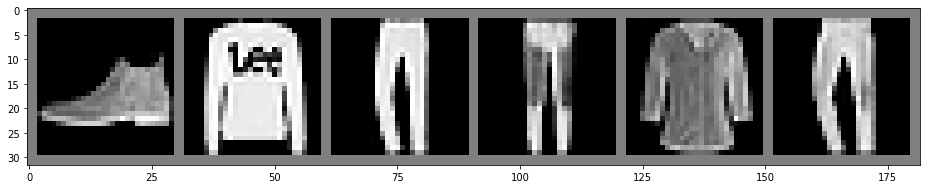

In [250]:
import torchvision

dataiter = iter(test_loader)
images,labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:6]))

In [251]:
outputs = net(images)
_,predicted = torch.max(outputs,1)
print(predicted)

tensor([9, 2, 1, 1, 6, 1, 6, 4, 5, 7, 4, 5, 7, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5,
        1, 2, 6, 0, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 4, 7, 2, 1,
        2, 6, 2, 2, 5, 8, 4, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 0, 4, 7, 8, 7, 0,
        2, 0, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 6, 7, 1, 8,
        0, 1, 2, 2, 3, 4, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 2, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4])


In [252]:
print(''.join('{}, '.format(labels_map[int(predicted[j].numpy())]) for j in range(6)))

Ankle Boot, Pullover, Trouser, Trouser, Shirt, Trouser, 


In [253]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    images, labels = data
    outputs = net(images)
    _,predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(100 * correct / total)

80.98
